# Loading, Visualizing, and Exploring the Data

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np

import seaborn as sns

%matplotlib inline

from scripts.load_data import *

#### Load the data and view the first few columns

In [7]:
[spectral_data,targets]=load_training_spectra()
[satellite,targets]=load_training_satellite_data()


ValueError: too many values to unpack (expected 1)

In [3]:
spectral_data.head()

,7497.96,7496.04,7494.11,7492.18,7490.25,7488.32,7486.39,7484.46,7482.54,7480.61,...,617.116,615.188,613.259,611.331,609.402,607.474,605.545,603.617,601.688,599.76
0,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,...,1.86431,1.84816,1.83288,1.81858,1.80247,1.78462,1.76644,1.75086,1.74335,1.74246
1,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,...,1.91071,1.89728,1.88298,1.86131,1.83355,1.80581,1.78410,1.77195,1.76479,1.75437
2,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,...,1.77356,1.76544,1.76124,1.75742,1.75113,1.74128,1.72894,1.71991,1.71562,1.71158
3,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,...,1.73527,1.72770,1.72349,1.72149,1.71630,1.70737,1.69952,1.69356,1.68812,1.68178
4,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,...,1.72088,1.70944,1.69711,1.68257,1.66762,1.65639,1.64929,1.64089,1.62805,1.61643


In [4]:
satellite.head()

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
0,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
1,-0.630435,-0.700000,-0.783875,-0.364146,1.165479,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
2,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
3,-0.753623,-0.836364,-0.929451,-0.633972,1.544098,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
4,-0.688406,-0.763636,-0.884658,-0.583576,1.276837,1.191691,-1.206971,0.011420,-0.906182,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843


# Descriptions of secondary data columns
### (copied from kaggle)

BSA: average long-term Black Sky Albedo measurements from MODIS satellite images (BSAN = near-infrared, BSAS = shortwave, BSAV = visible)

CTI: compound topographic index calculated from Shuttle Radar Topography Mission elevation data
 * From wikipedia: "The topographic wetness index (TWI), also known as the compound topographic index (CTI), is a steady state wetness index. It is commonly used to quantify topographic control on hydrological processes.[1] The index is a function of both the slope and the upstream contributing area per unit width orthogonal to the flow direction. The index was designed for hillslope catenas. Accumulation numbers in flat areas will be very large, so TWI will not be a relevant variable. The index is highly correlated with several soil attributes such as horizon depth, silt percentage, organic matter content, and phosphorus.[2]"

ELEV: Shuttle Radar Topography Mission elevation data

EVI: average long-term Enhanced Vegetation Index from MODIS satellite images.

LST: average long-term Land Surface Temperatures from MODIS satellite images (LSTD = day time temperature, LSTN = night time temperature)

Ref: average long-term Reflectance measurements from MODIS satellite images (Ref1 = blue, Ref2 = red, Ref3 = near-infrared, Ref7 = mid-infrared)

Reli: topographic Relief calculated from Shuttle Radar Topography mission elevation data

TMAP & TMFI: average long-term Tropical Rainfall Monitoring Mission data (TMAP = mean annual precipitation, TMFI = modified Fournier index)


#### List the columns containing secondary data, assign to list (?) named 'secondary'

In [36]:


secondary=satellite.columns
idx=satellite.loc
print(idx)

In [6]:
satellite.describe()

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,-0.572226,-0.623242,-0.691976,-0.213203,0.533953,0.698859,-0.413636,-0.092569,-0.698528,-0.506340,-0.661642,-0.638464,0.276786,0.563194,0.746303
std,0.235748,0.239737,0.281652,0.661576,1.396132,0.683280,0.686773,0.861165,0.272107,0.329785,0.365572,0.326460,1.074667,0.649622,0.825242
min,-1.007246,-0.972727,-1.175812,-0.945472,-1.326726,-0.881924,-1.906958,-2.720276,-1.127273,-1.642857,-1.265010,-1.115423,-0.639823,-0.670742,-0.862741
25%,-0.739130,-0.781818,-0.895857,-0.548063,-0.812249,0.199708,-0.906601,-0.622874,-0.900364,-0.753247,-0.917184,-0.881048,-0.452939,0.190708,0.056843
50%,-0.608696,-0.681818,-0.761478,-0.344714,0.867038,0.659621,-0.476813,-0.019511,-0.754182,-0.531540,-0.753623,-0.740423,-0.130139,0.316667,0.729111
75%,-0.463768,-0.563636,-0.604703,-0.104917,1.292428,1.129738,0.080083,0.631670,-0.594909,-0.269944,-0.445135,-0.432460,0.532450,0.955935,1.414215
max,0.217391,0.200000,0.223964,3.596526,4.891537,2.645044,1.320112,1.519218,0.285818,0.335807,0.366460,0.290323,5.612300,2.161892,2.976315


### look at means, variance of secondary factors

In [53]:
help(sns.set_context)

Help on function set_context in module seaborn.rcmod:

set_context(context=None, font_scale=1, rc=None)
    Set the plotting context parameters.
    
    This affects things like the size of the labels, lines, and other
    elements of the plot, but not the overall style. The base context
    is "notebook", and the other contexts are "paper", "talk", and "poster",
    which are version of the notebook parameters scaled by .8, 1.3, and 1.6,
    respectively.
    
    Parameters
    ----------
    context : dict, None, or one of {paper, notebook, talk, poster}
        A dictionary of parameters or the name of a preconfigured set.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        context dictionaries. This only updates parameters that are
        considered part of the context definition.
    
    Examples
    

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


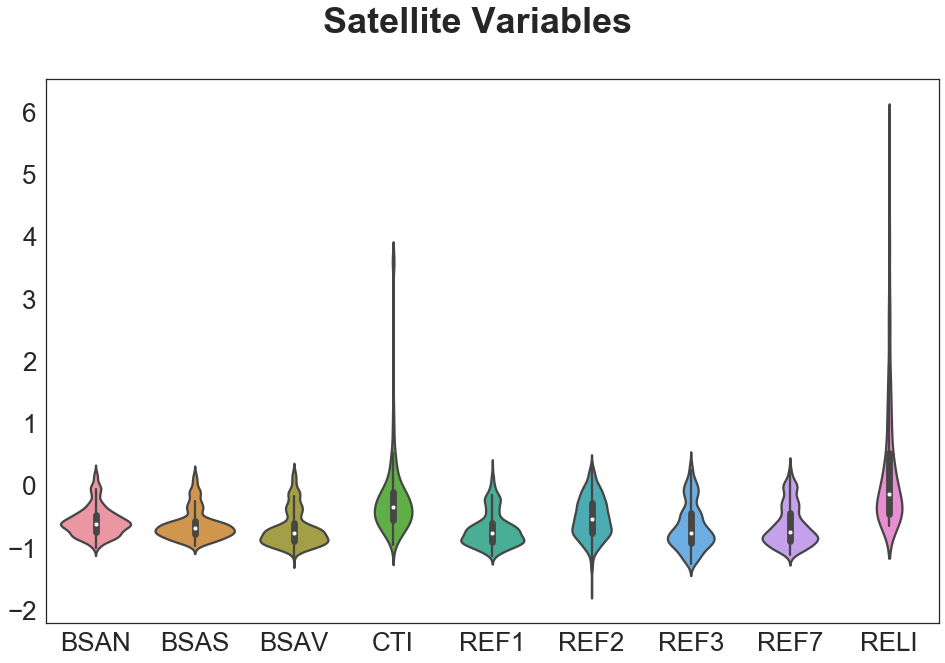

In [58]:
sns.set_context("talk",font_scale=2)
sns.set_style("white")

plt.figure(figsize=(16,10))
sns.violinplot(satellite[satt_measures])
plt.suptitle("Satellite Variables", fontsize=36, fontweight="bold")
              

/Applications/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


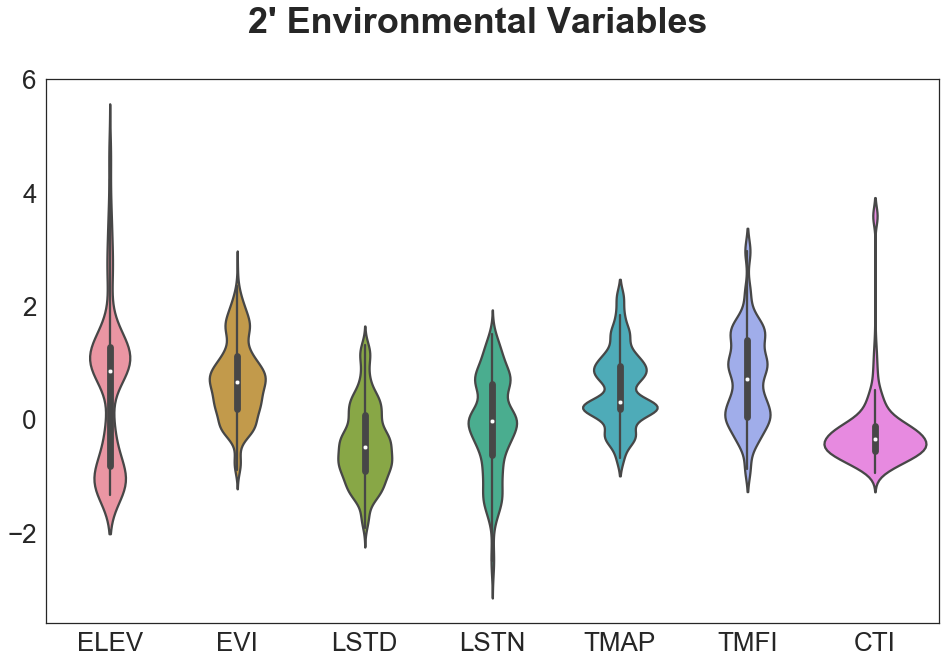

In [59]:
sns.set_context("talk",font_scale=2)
sns.set_style("white")

plt.figure(figsize=(16,10))
sns.violinplot(satellite[climate])
plt.suptitle("2' Environmental Variables", fontsize=36, fontweight="bold")

### Look at pairwise, marginal distributions for a subset of secondary data columns

In [65]:
climate=["ELEV","EVI","LSTD","LSTN","TMAP","TMFI","CTI"]
satt_measures=["BSAN", "BSAS", "BSAV", "CTI", "REF1","REF2", "REF3", "REF7", "RELI"]

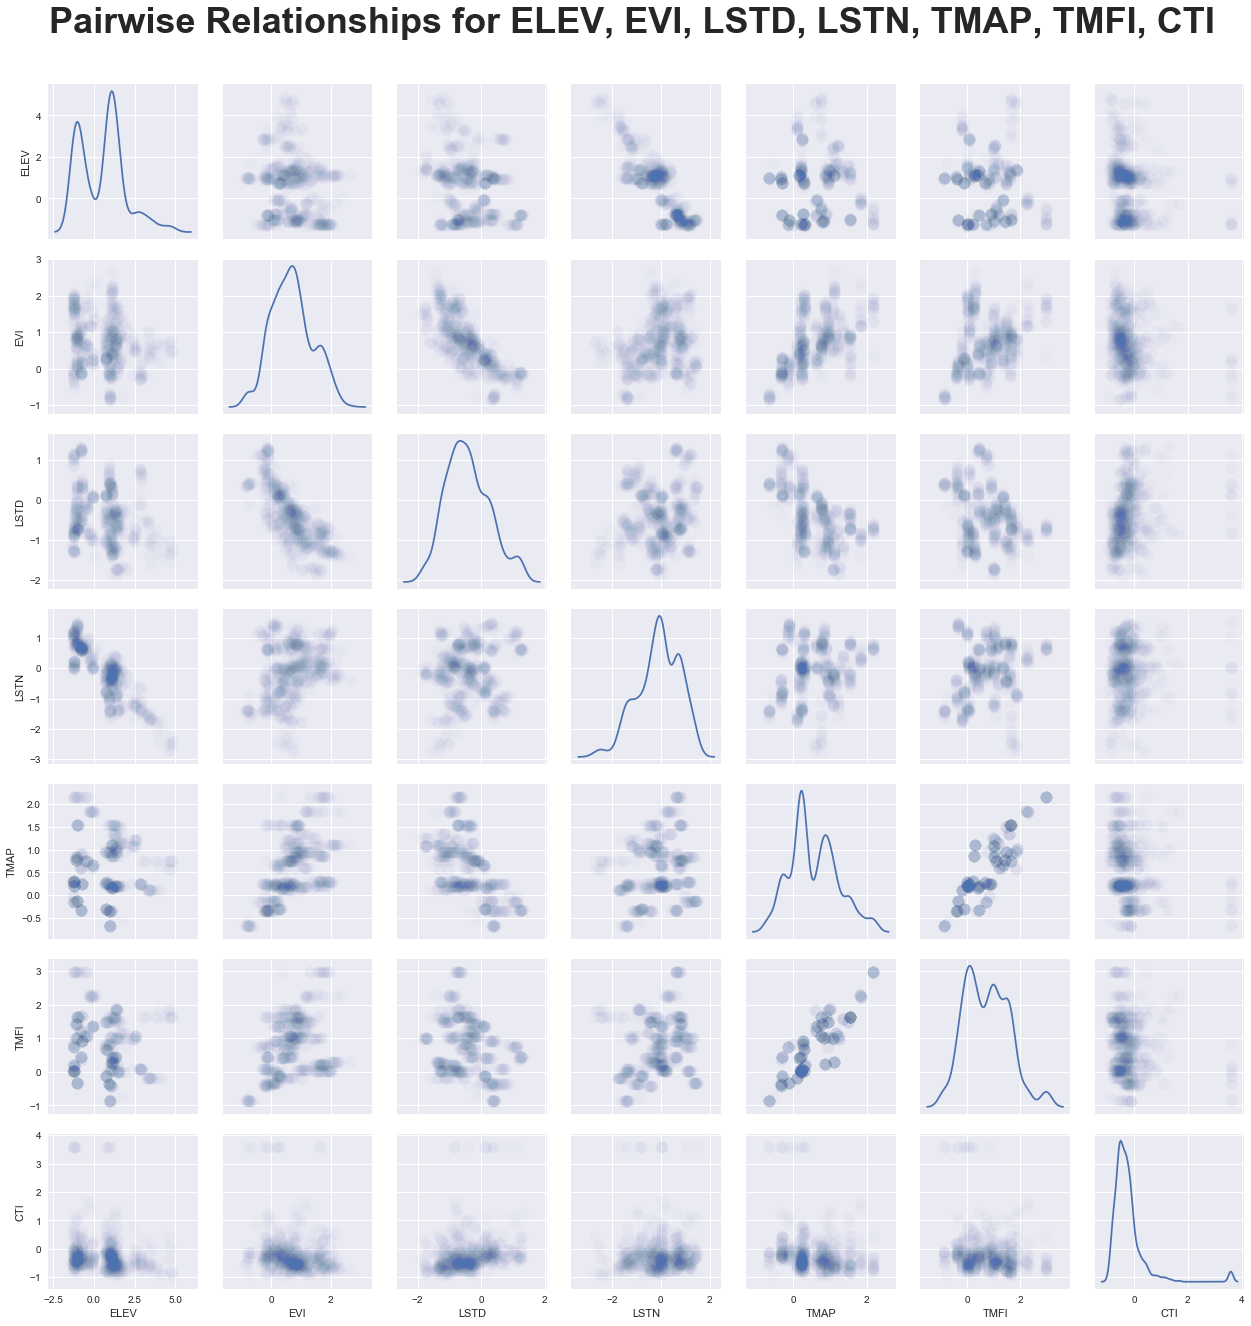

In [19]:
sns.pairplot(data=satellite,
                vars=climate,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(climate),
            fontsize=36,fontweight='bold',y=1.05
            );

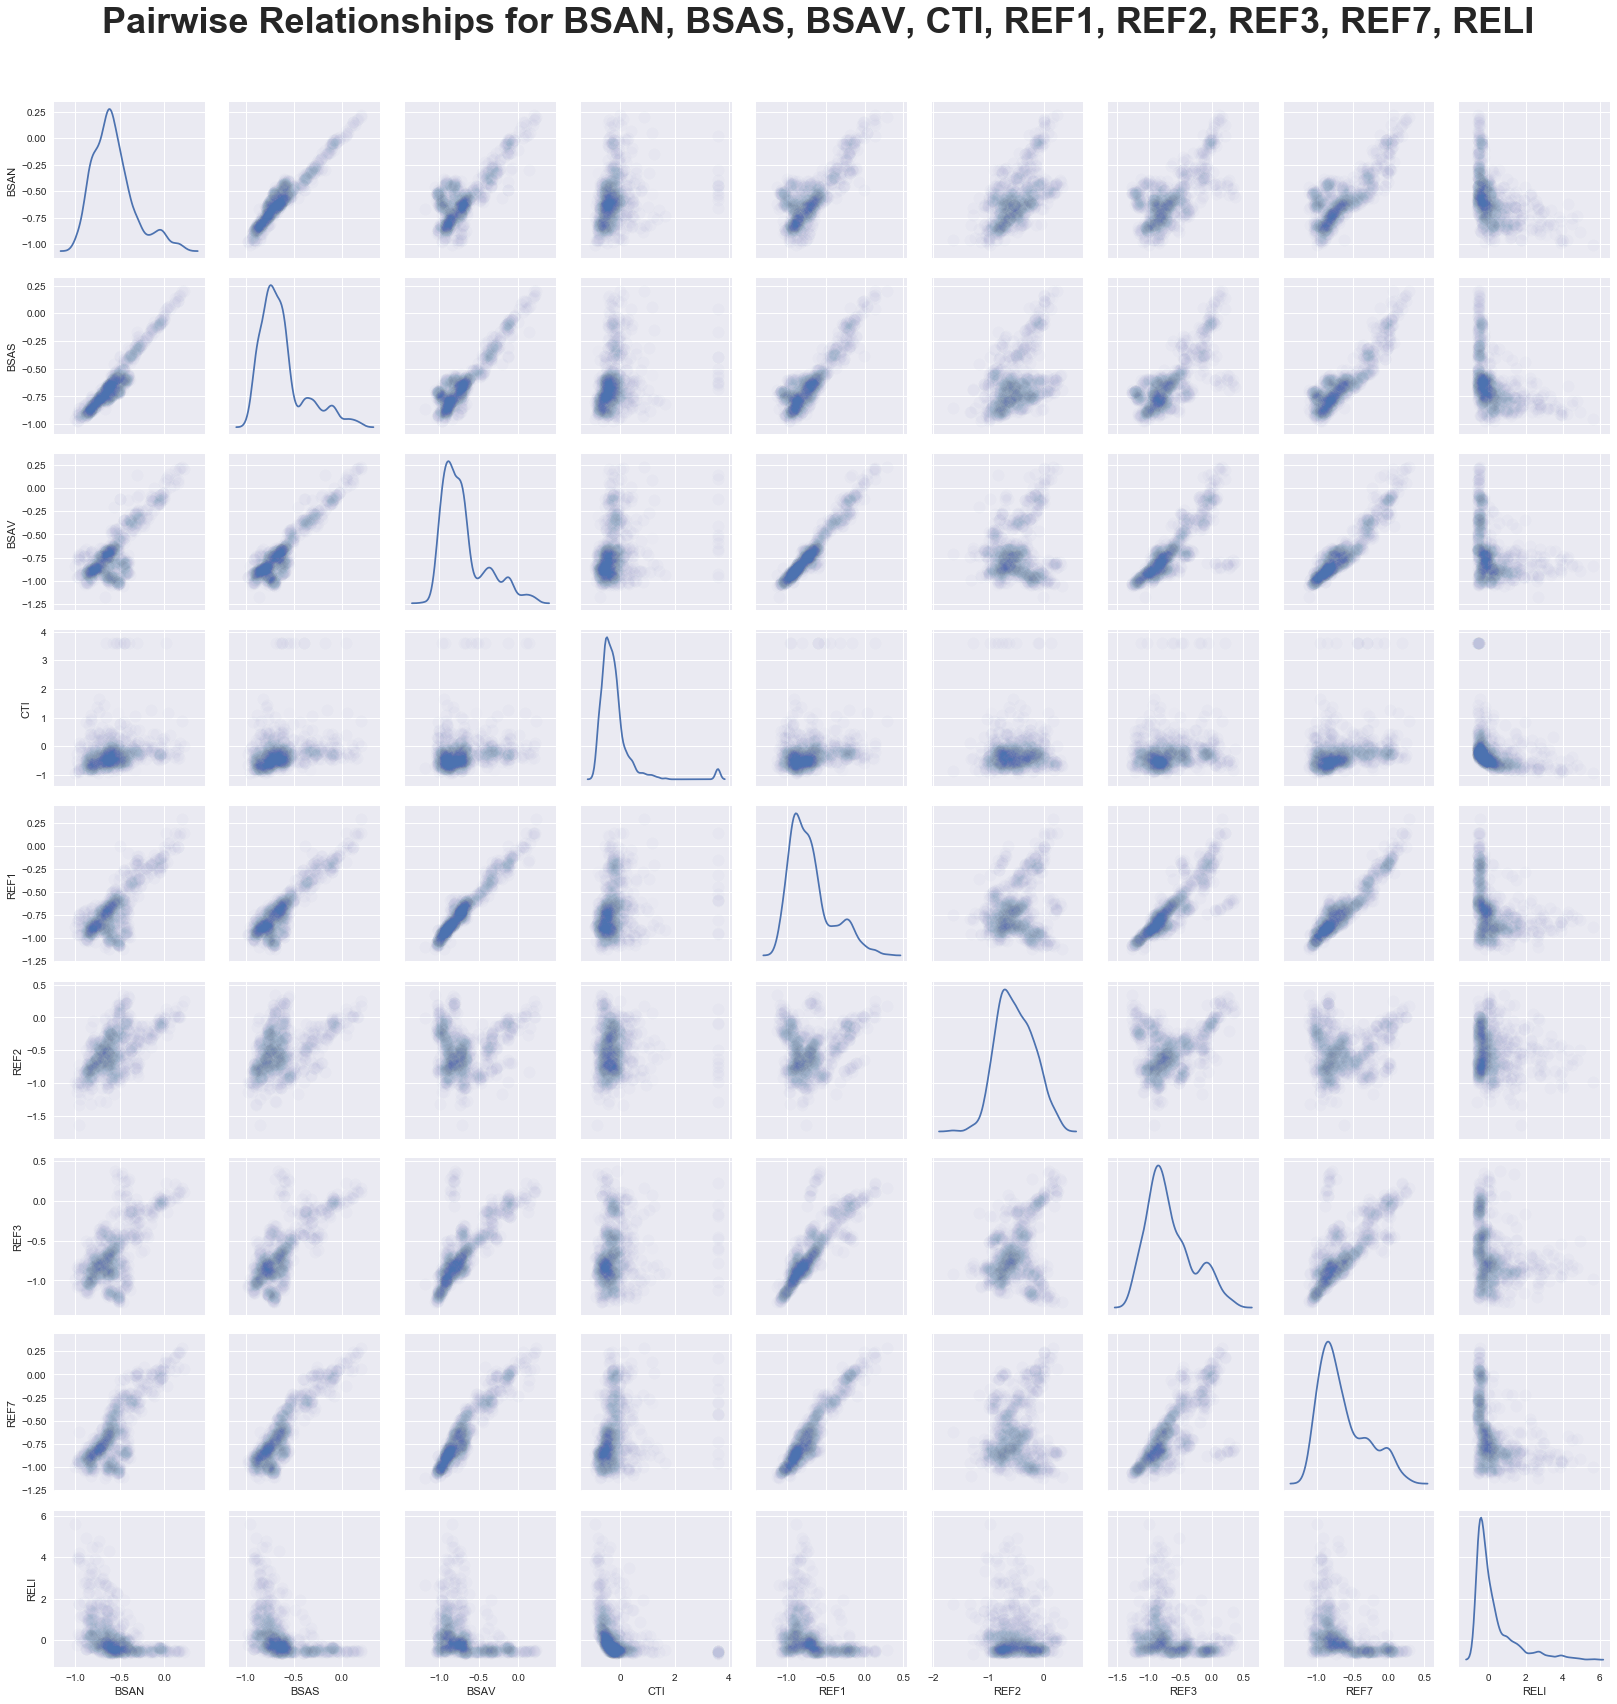

In [23]:
sns.pairplot(data=satellite,
                vars=satt_measures,
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(satt_measures),
            fontsize=36,fontweight='bold',y=1.05
            );

### Pairwise relationships between secondary data and targets


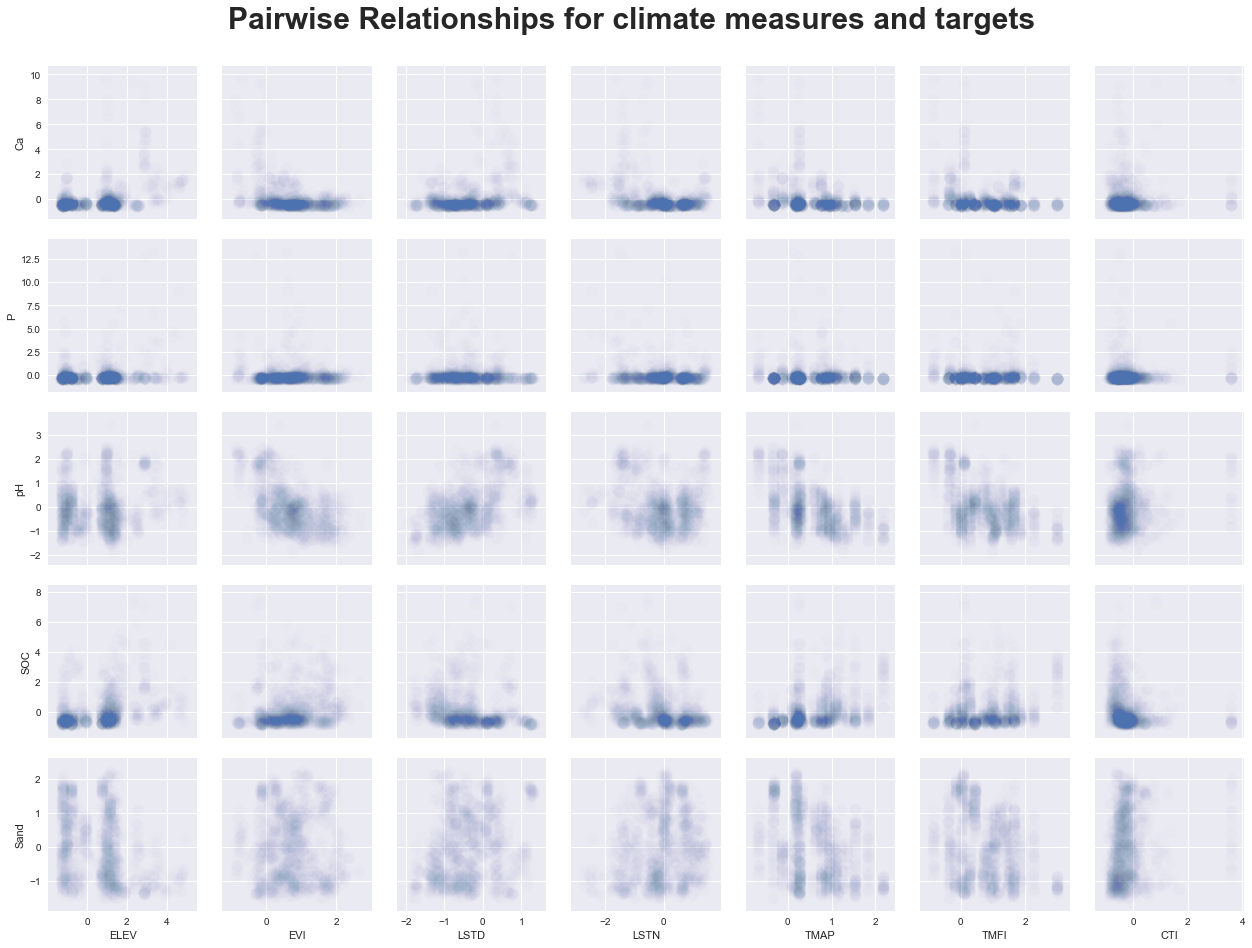

In [20]:
secondary_targets=satellite.join(targets)
sns.pairplot(data=secondary_targets,
             x_vars=climate,
             y_vars=targets.columns,
            plot_kws={'alpha':0.01,'s':144})

plt.suptitle('Pairwise Relationships for climate measures and targets',
            fontsize=30,fontweight='bold',y=1.05
            );

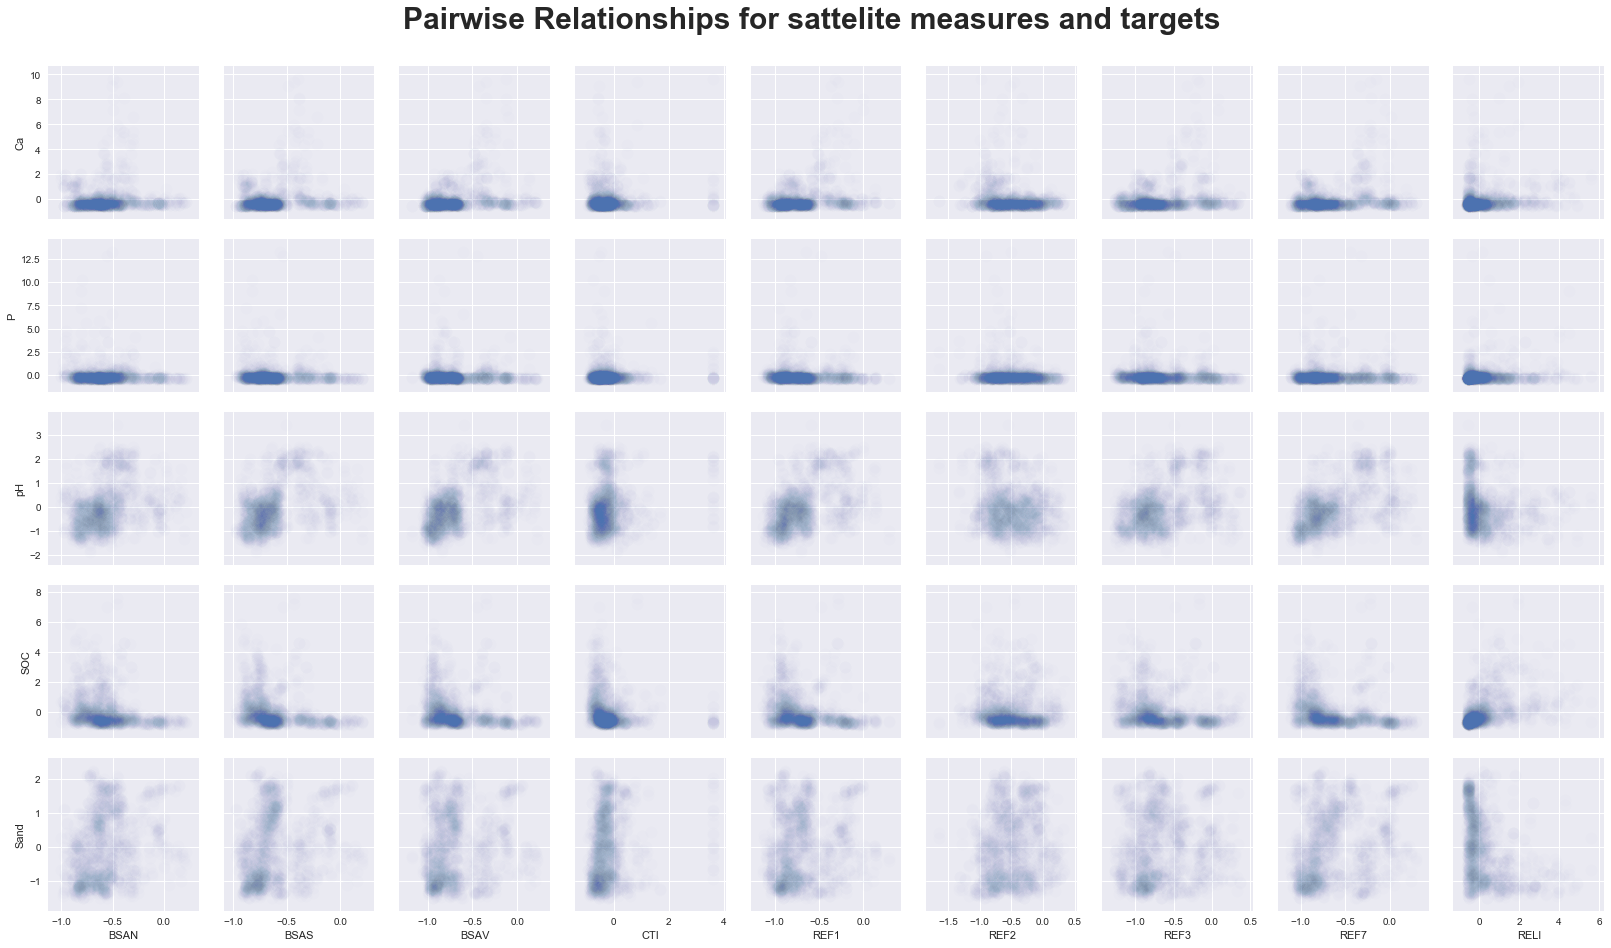

In [24]:
sns.pairplot(data=secondary_targets,
             x_vars=satt_measures,
             y_vars=targets.columns,
            plot_kws={'alpha':0.01,'s':144})

plt.suptitle('Pairwise Relationships for sattelite measures and targets',
            fontsize=30,fontweight='bold',y=1.05
            );

### Since many of the sattelite measures are highly correlated, do some dimensionality reduction

In [27]:
import sklearn.decomposition

In [116]:
sat=satellite[secondary].as_matrix();
PCA=sklearn.decomposition.PCA()
PCA.fit(sat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [114]:
PCA.components_.shape

(10, 15)

In [118]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

In [121]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



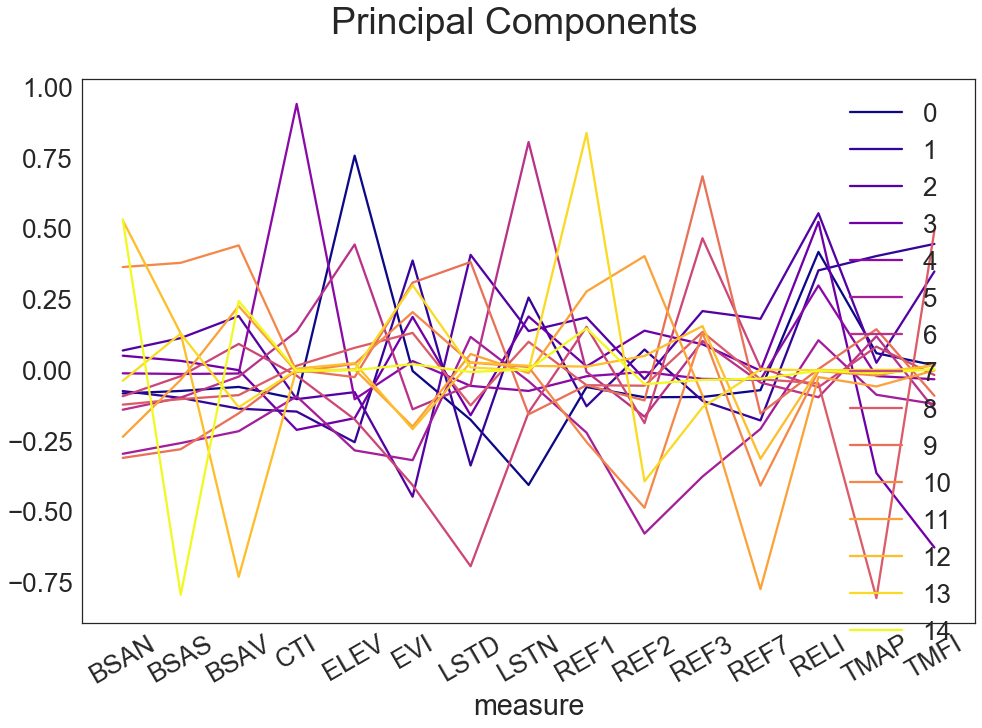

In [129]:
plt.figure(figsize=(16,10))
colors = plt.cm.plasma(np.linspace(0,1,len(PCA.components_)))

for c in range(len(PCA.components_)):
    plt.plot(PCA.components_[c,:],color=colors[c])

plt.xlabel("measure")
plt.suptitle("Principal Components")
plt.xticks(range(15),secondary,fontsize="small",rotation=30)
plt.legend(range(15))

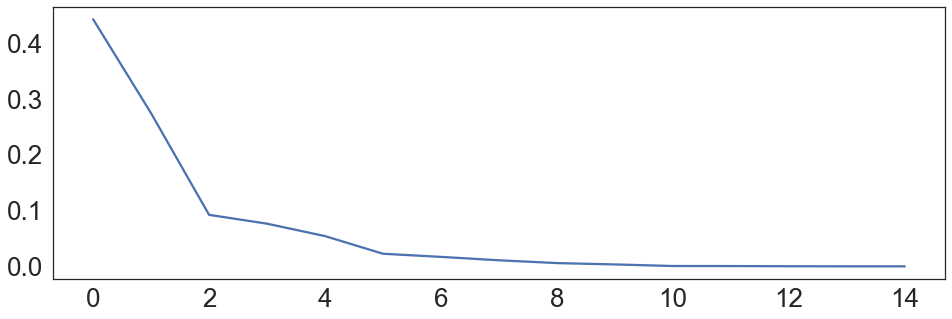

In [80]:
plt.figure(figsize=(16,5))
var_exp=PCA.explained_variance_ratio_
plt.plot(var_exp)

{'bodies': [<matplotlib.collections.PolyCollection at 0x121923fd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1219bc048>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x121923ef0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1219a96d8>}

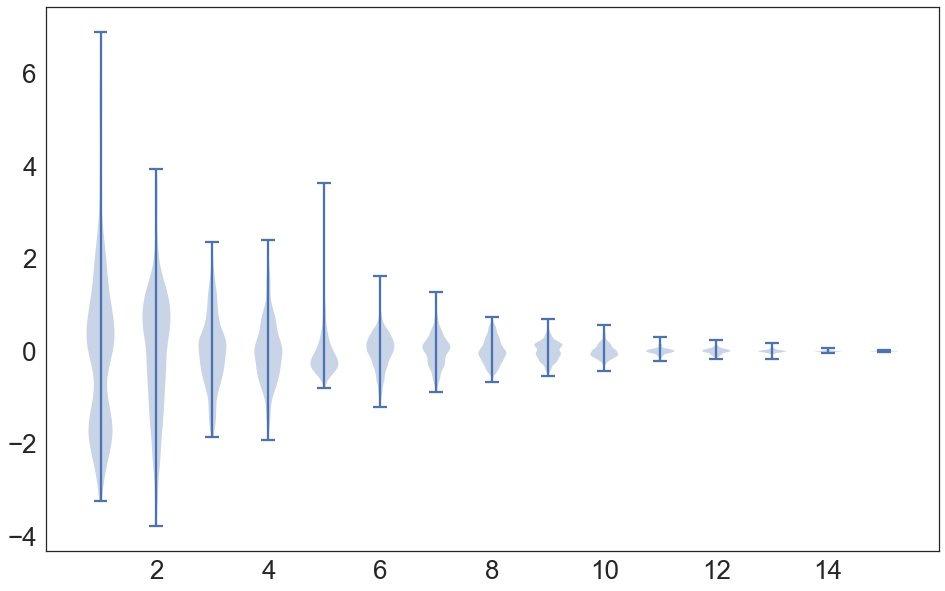

In [79]:
transformed_X=PCA.transform(sat)
transformed_X.shape
plt.figure(figsize=(16,10))
plt.violinplot(transformed_X)

#### Visualize marginal and pairwise distribution of outputs

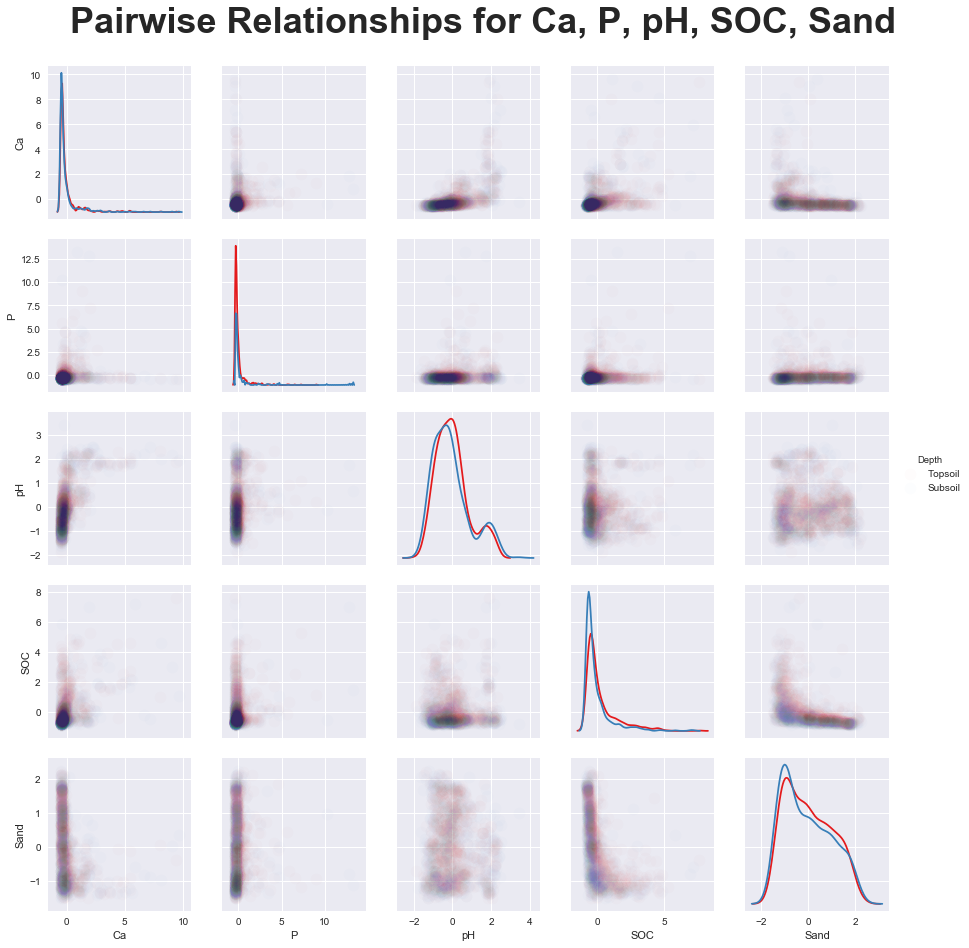

In [9]:
sns.pairplot(data=data,
                vars=output_variables,
             hue="Depth",
             palette='Set1',
            plot_kws={'alpha':0.01,'s':144},
            diag_kind='kde');

plt.suptitle('Pairwise Relationships for '+ ', '.join(output_variables),
            fontsize=36,fontweight='bold',y=1.05
            );

#### Select and Plot a Random Spectrum

In [10]:
data_columns = [column for column in data.columns if column.startswith('m')]
wavenumbers = [float(column.lstrip('m')) for column in data_columns]

In [11]:
random_data_point = data.sample(1)
random_data_point

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
734,NC0kMLg9,0.121977,0.118514,0.114934,0.11701,0.123709,0.126894,0.122015,0.115802,0.113841,...,-1.017641,-0.300034,0.869446,0.246421,Topsoil,-0.260171,-0.207343,-0.764605,0.642365,-0.834947


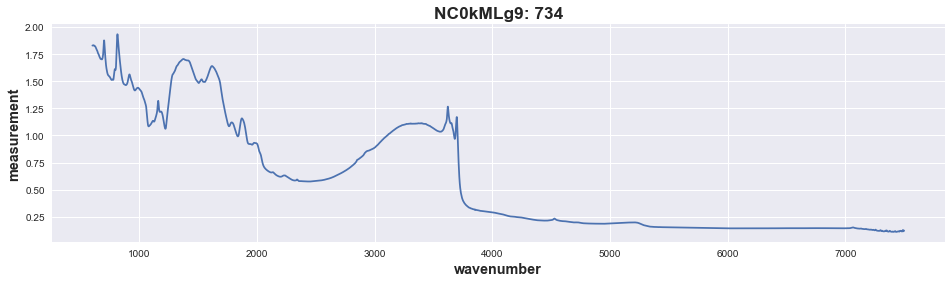

In [12]:
spectrum_as_dataframe = random_data_point[data_columns]

spectrum_as_series = spectrum_as_dataframe.iloc[0]
PIDN = random_data_point['PIDN'].iloc[0]
spectrum_array = spectrum_as_series.as_matrix()
numericID = spectrum_as_series.name

plt.figure(figsize=(16,4))
plt.plot(wavenumbers,spectrum_array); plt.title(PIDN+': '+str(numericID), 
                                    fontweight='bold',fontsize='xx-large');
plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

#### Plot Average Spectrum +/- 1 SD

First we grab the descriptive stats using `.describe()`, then we use the `mean`s and `std`s to build an `errorbar` plot.

One possible alteration would be to use the median (`50%`) and quartile values (`25%` and `75%`) instead. I suspect we might get a different picture, especially of the variability.

In [14]:
top_spectra_dataframe = data_top[data_columns]
sub_spectra_dataframe=data_sub[data_columns]

In [15]:
stats_top = top_spectra_dataframe.describe()
stats_sub = sub_spectra_dataframe.describe()



In [17]:
average_values_top = stats_top.loc['mean'].as_matrix()
sds_top = stats_top.loc['std'].as_matrix()

average_values_sub = stats_sub.loc['mean'].as_matrix()
sds_sub = stats_sub.loc['std'].as_matrix()

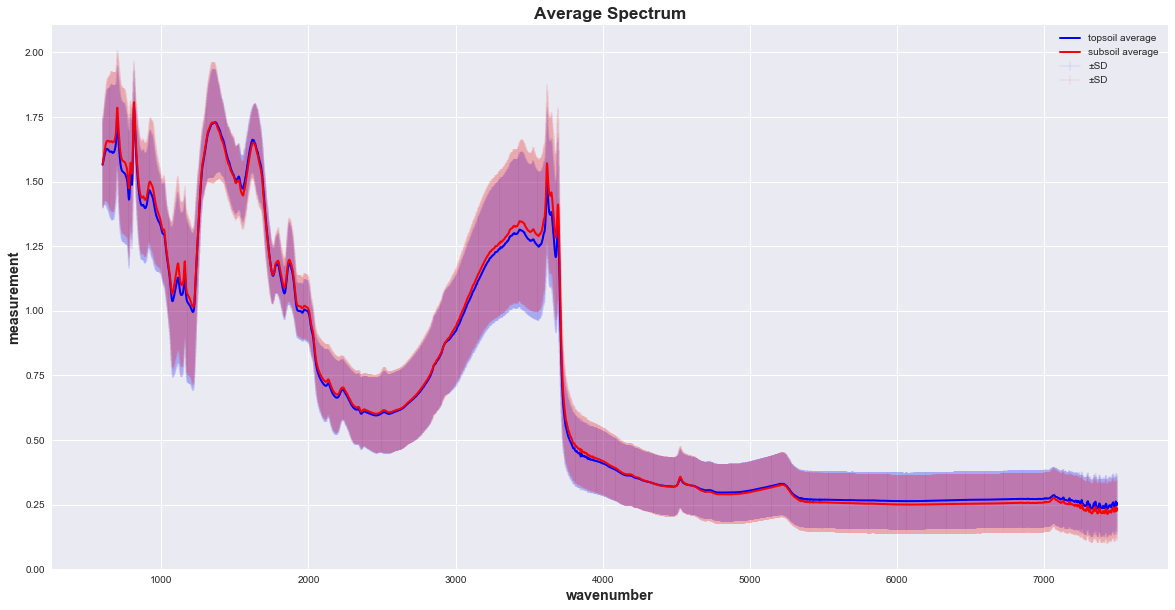

In [21]:
plt.figure(figsize=(20,10))

plt.errorbar(x=wavenumbers,y=average_values_top,yerr=sds_top,
            errorevery=1,ecolor='b',color='b',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_top,color='b',
         linewidth=2,zorder=1,label='topsoil average'
        );

plt.errorbar(x=wavenumbers,y=average_values_sub,yerr=sds_sub,
            errorevery=1,ecolor='r',color='r',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_sub,color='r',
         linewidth=2,zorder=1,label='subsoil average'
        );

plt.legend()
plt.title('Average Spectrum', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

In [28]:
stats_top.loc["25%"]

m7497.96    0.181271
m7496.04    0.175873
m7494.11    0.169516
m7492.18    0.173748
m7490.25    0.182491
m7488.32    0.186042
m7486.39    0.178502
m7484.46    0.169126
m7482.54    0.167188
m7480.61    0.166855
m7478.68    0.166605
m7476.75    0.169269
m7474.82    0.174696
m7472.89    0.179834
m7470.97    0.183146
m7469.04    0.182337
m7467.11    0.178390
m7465.18    0.176809
m7463.25    0.175691
m7461.32    0.170587
m7459.39    0.165180
m7457.47    0.162948
m7455.54    0.165403
m7453.61    0.169977
m7451.68    0.171327
m7449.75    0.169903
m7447.82    0.167328
m7445.89    0.169969
m7443.97    0.170904
m7442.04    0.166357
              ...   
m655.686    1.448520
m653.758    1.449970
m651.829    1.452890
m649.901    1.454040
m647.972    1.456040
m646.044    1.461500
m644.115    1.467120
m642.187    1.471190
m640.258    1.474660
m638.33     1.477380
m636.401    1.483370
m634.473    1.485560
m632.544    1.485020
m630.616    1.487590
m628.687    1.491020
m626.759    1.493820
m624.83     1

In [29]:
med_values_top=top_spectra_dataframe.median(axis=0)
upperQuart_top = stats_top.loc["25%"].as_matrix()
lowerQuart_top = stats_top.loc['75%'].as_matrix()

med_values_sub=sub_spectra_dataframe.median(axis=0)
upperQuart_sub = stats_sub.loc["25%"].as_matrix()
lowerQuart_sub = stats_sub.loc["75%"].as_matrix()


In [ ]:
plt.figure(figsize=(20,10))

plt.errorbar(x=wavenumbers,y=med_values_top,yerr=sds_top,
            errorevery=1,ecolor='b',color='b',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_top,color='b',
         linewidth=2,zorder=1,label='topsoil average'
        );

plt.errorbar(x=wavenumbers,y=average_values_sub,yerr=sds_sub,
            errorevery=1,ecolor='r',color='r',alpha=0.05,zorder=1,
            label='±SD');

plt.plot(wavenumbers,average_values_sub,color='r',
         linewidth=2,zorder=1,label='subsoil average'
        );

plt.legend()
plt.title('Average Spectrum', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('measurement',fontweight='bold',fontsize='x-large');

In [31]:
np.concatenate(upperQuart_top,lowerQuart_top)

TypeError: only integer scalar arrays can be converted to a scalar index

#### SNR by Wavenumber

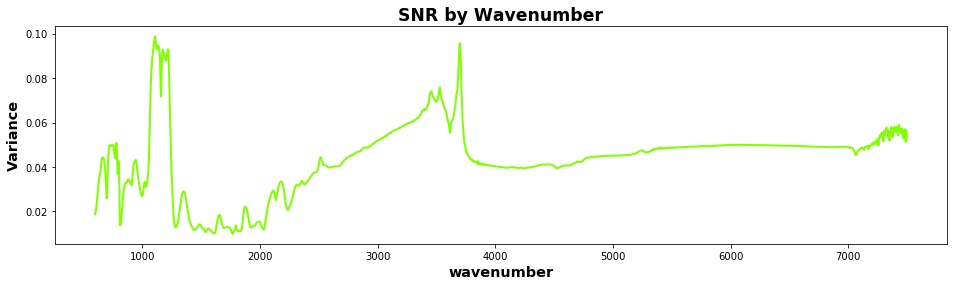

In [24]:
plt.figure(figsize=(16,4))

plt.plot(wavenumbers,
         #np.square(sds),
         np.divide(np.square(sds),
                            average_values),
         color='chartreuse',
         linewidth=2,zorder=1,
        );

plt.title('SNR by Wavenumber', fontweight='bold',fontsize='xx-large');

plt.xlabel('wavenumber',fontweight='bold',fontsize='x-large');
plt.ylabel('Variance',fontweight='bold',fontsize='x-large');